# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/CLV.csv")

In [ ]:
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"],axis = 1)
y = df["Customer Lifetime Value"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes":[(10,),(20,5,),(10,50,25,)],
    "activation":['relu','logistic'],
    "alpha":[0.01,0.001]
}

In [ ]:
grid = GridSearchCV(clf,params,cv = 5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.01, 0.001],
                         'hidden_layer_sizes': [(10,), (20, 5), (10, 50, 25)]})

In [ ]:
print(grid.best_params_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 50, 25)}


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
model = MLPRegressor(**grid.best_params_)

In [ ]:
p_dict = {
    "hidden_layer_sizes":(10,50,25,),
    "activation":'relu',
    "alpha":0.001
}

modell = MLPRegressor(**p_dict)

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mse_in_sample = mean_squared_error(y_train, y_train_pred)
mse_out_of_sample = mean_squared_error(y_test, y_test_pred)
print("In_sample MSE =",mse_in_sample)
print("Out of sample MSE =",mse_out_of_sample)

In_sample MSE = 41068691.43326019
Out of sample MSE = 47928277.90325096


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'relu'))

In [ ]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.01))
model.fit(X_train,y_train,batch_size = 32,epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 89963504.0000
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 45675180.0000
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 42779712.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 42150768.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 41805152.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 41700944.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 41696964.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 41641860.0000
Epoch 9/100
200/200 [==============================] - 0s 1ms/step - loss: 41587304.0000
Epoch 10/100
200/200 [==============================] - 0s 1ms/step - loss: 41494480.0000
Epoch 11/100
200/200 [==============================] - 0s 1ms/step - loss: 41488636.0000
Epoch 12/100
200/20

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [ ]:
from tensorflow.keras.utils import plot_model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                204       
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


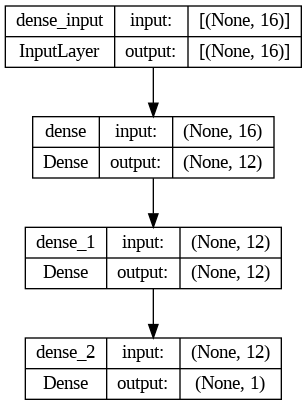

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
from ann_visualizer.visualize import ann_viz
from pdf2image import convert_from_path

In [ ]:
ann_viz(model, title = "MLP NN Viz",filename="/content/mlp_model")

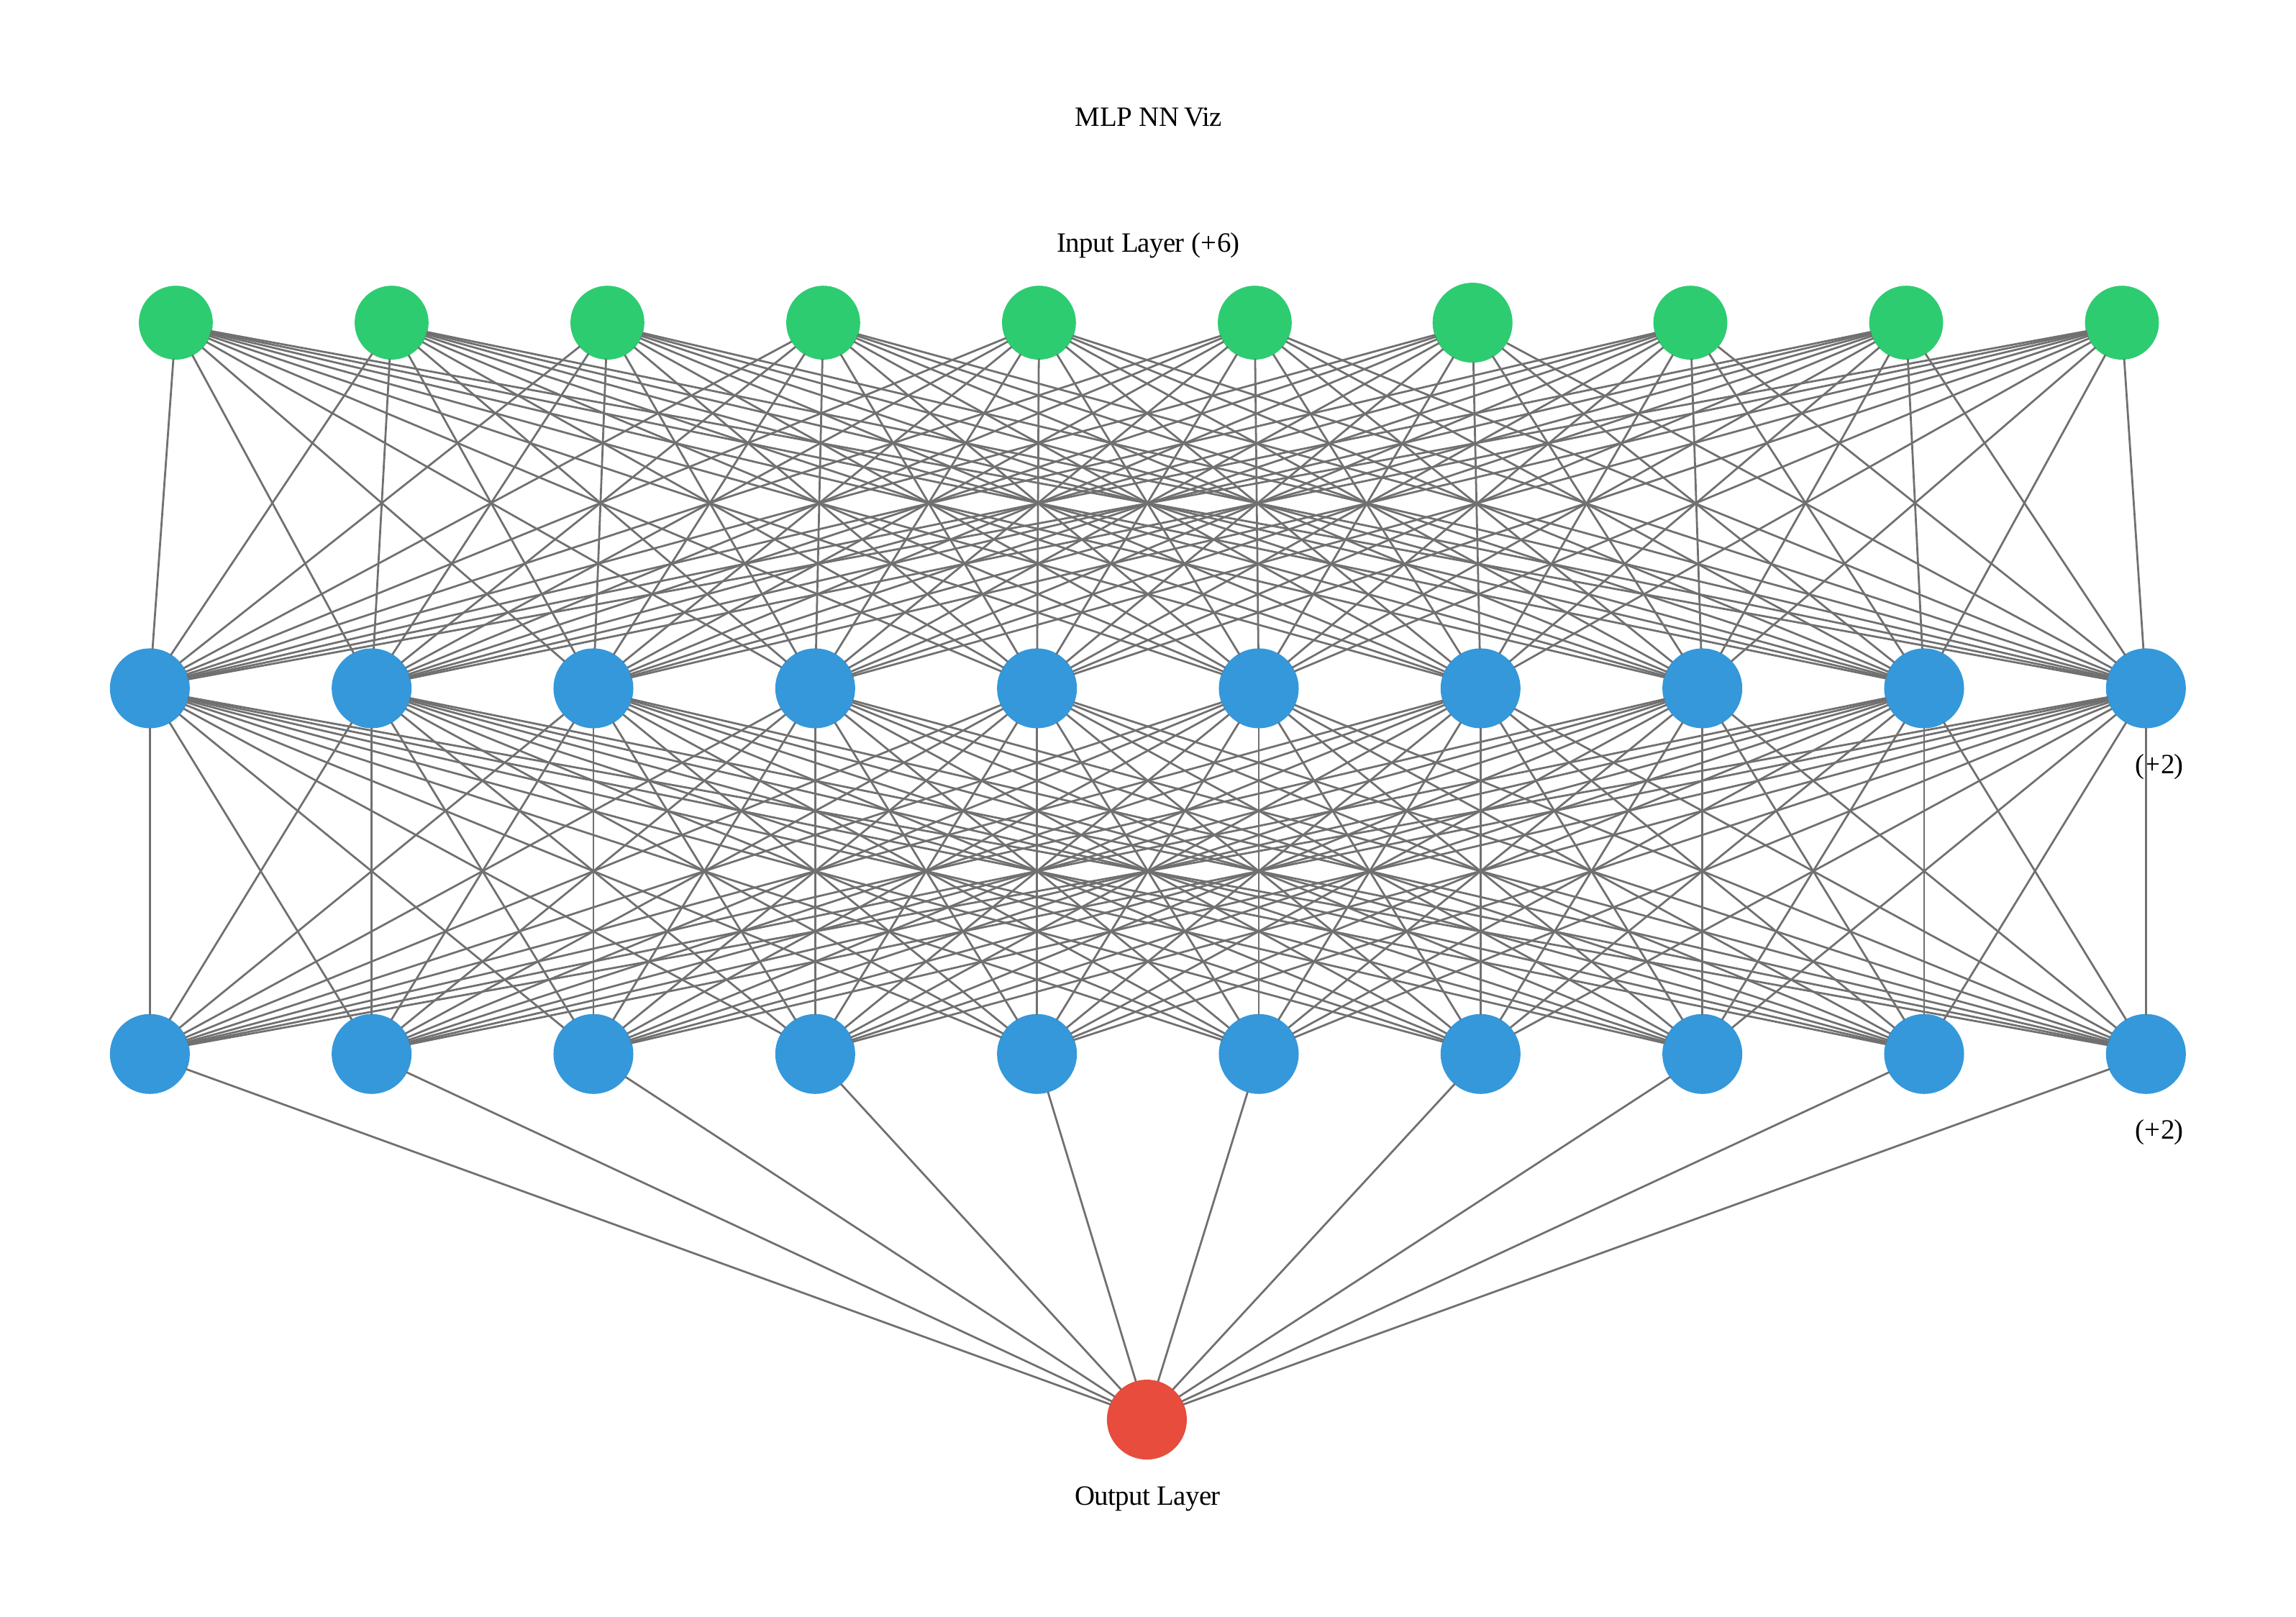

In [ ]:
images = convert_from_path("/content/mlp_model.pdf")
images[0]